In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

### Data preprocessing

In [2]:
df = pd.read_csv('iris.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset = df.values

x = dataset[:, 0:4].astype(float)
y = dataset[:, 4]

In [5]:
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)
dummy_y = to_categorical(encoded_y)

Text(0, 0.5, 'Sepal width')

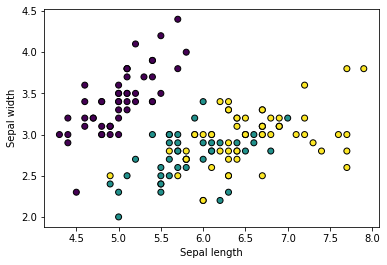

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=encoded_y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Petal width')

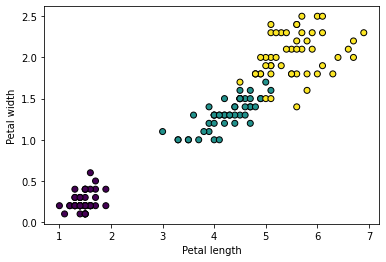

In [7]:
plt.scatter(x[:, 2], x[:, 3], c=encoded_y, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

### Create model

In [8]:
train_x, test_x, train_y, test_y = train_test_split(x, dummy_y, test_size=0.20)

#### Ver. 1 (2 layers, 4-3 neurons)

In [18]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

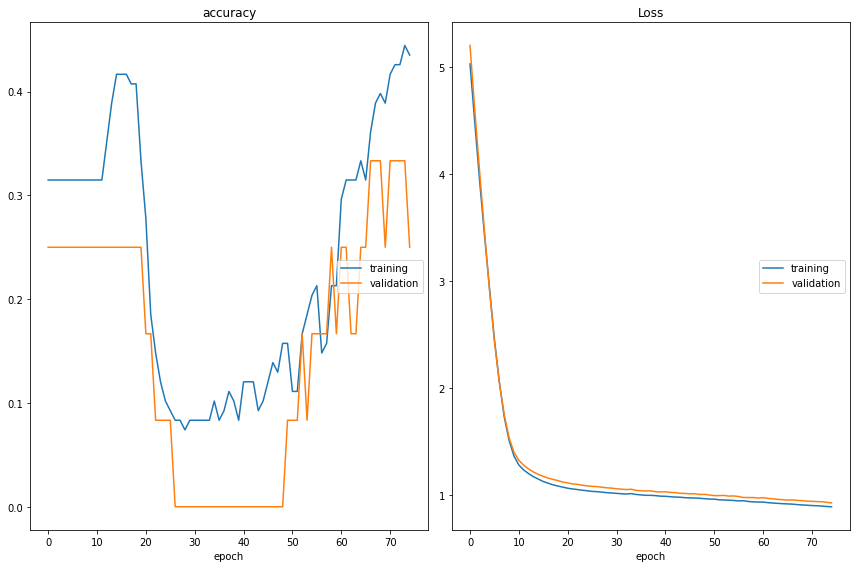

accuracy
	training         	 (min:    0.074, max:    0.444, cur:    0.435)
	validation       	 (min:    0.000, max:    0.333, cur:    0.250)
Loss
	training         	 (min:    0.889, max:    5.028, cur:    0.889)
	validation       	 (min:    0.925, max:    5.201, cur:    0.925)


In [25]:
model.fit(train_x, train_y, epochs=75, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [26]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 16ms/step - loss: 0.4046 - accuracy: 1.0000
Final test set loss: 0.404609
Final test set accuracy: 1.000000


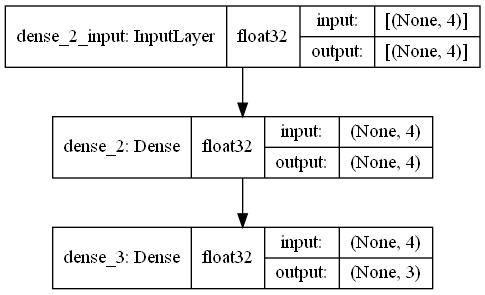

In [27]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [28]:
model.save('model-1.h5')

#### Ver. 2 (3 layers, 4-4-3 neurons)

In [30]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

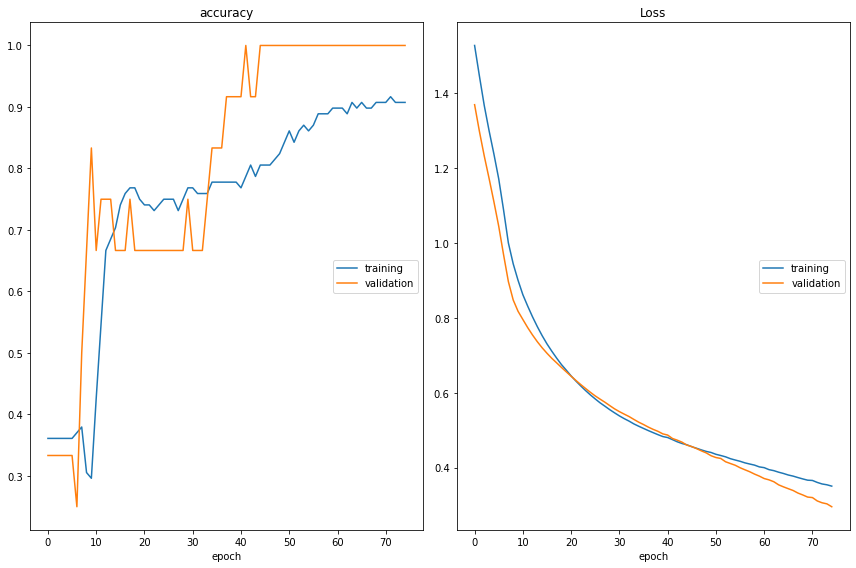

accuracy
	training         	 (min:    0.296, max:    0.917, cur:    0.907)
	validation       	 (min:    0.250, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.350, max:    1.528, cur:    0.350)
	validation       	 (min:    0.295, max:    1.370, cur:    0.295)


In [32]:
model.fit(train_x, train_y, epochs=75, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [33]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 16ms/step - loss: 0.2633 - accuracy: 1.0000
Final test set loss: 0.263316
Final test set accuracy: 1.000000


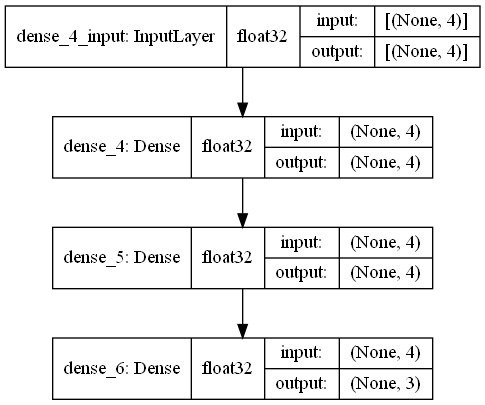

In [35]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [36]:
model.save('model-2.h5')

#### Ver. 3 (4 layers, 4-5-5-3 neurons)

In [61]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [62]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

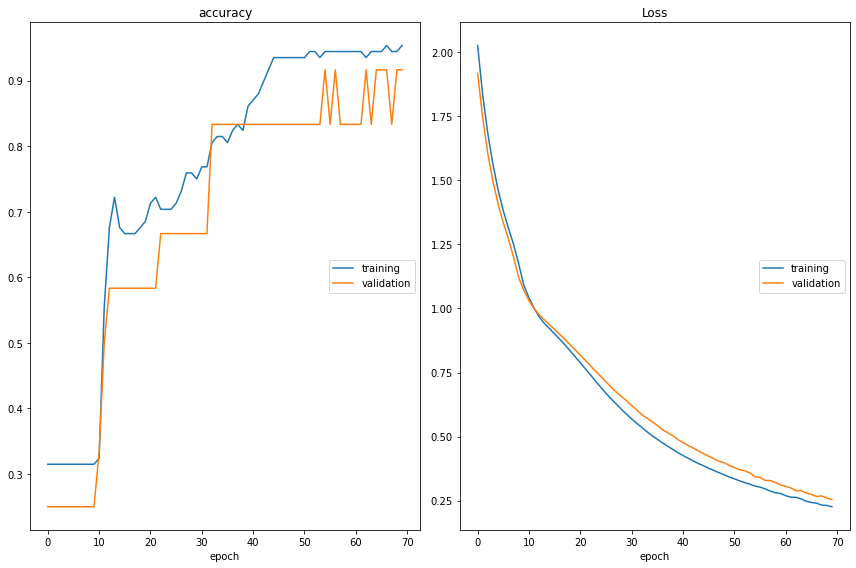

accuracy
	training         	 (min:    0.315, max:    0.954, cur:    0.954)
	validation       	 (min:    0.250, max:    0.917, cur:    0.917)
Loss
	training         	 (min:    0.226, max:    2.026, cur:    0.226)
	validation       	 (min:    0.255, max:    1.917, cur:    0.255)


In [63]:
model.fit(train_x, train_y, epochs=70, batch_size=10, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [64]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 18        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 16ms/step - loss: 0.1551 - accuracy: 1.0000
Final test set loss: 0.155114
Final test set accuracy: 1.000000


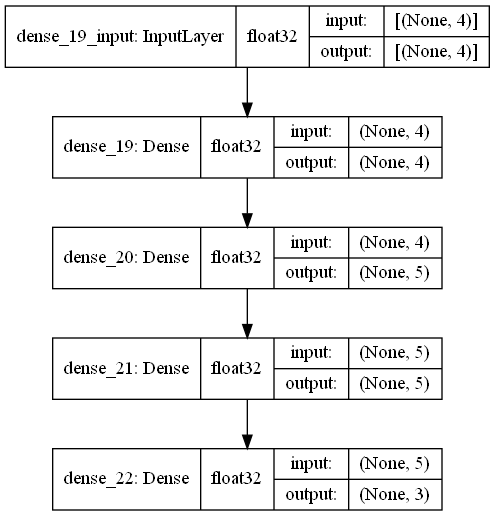

In [66]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [67]:
model.save('model-3.h5')